In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Imposto de Renda

### Loading Raw Data

In [4]:
imp_rnd = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\\rio dataframes\\Outside Data\\imposto_renda.csv', sep=',')

In [9]:
hoods = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\\rio dataframes\\Outside Data\\complete_bairros.csv', index_col=0)

### Comparing Neighborhoods Names Formats in Old and New Data

In [228]:
hoods_uni = hoods['bairros'].unique()

In [229]:
imp_uni = imp_rnd['NOME'].unique()

In [230]:
len(hoods_uni), len(imp_uni)

(163, 166)

In [231]:
suspects = imp_uni[[i.lower() not in [j.lower() for j in hoods_uni] for i in imp_uni]]

In [232]:
suspects

array(['são cristóvão', 'freguesia jacarepaguá', 'parque colúmbia',
       'osvaldo cruz', 'vila kosmos', 'freguesia', 'turiaçú'],
      dtype=object)

In [54]:
hoods_uni[[i not in [j.lower() for j in imp_uni] for i in hoods_uni]]

array(['freguesia (ilha do governador)', 'freguesia (jacarepaguá)',
       'gericinó', 'imperial de são cristóvão', 'jabour', 'lapa',
       'oswaldo cruz', 'parque columbia', 'turiaçu', 'vila cosmos',
       'vila kennedy'], dtype=object)

### Formatting Neighborhoods Names in New Data

In [102]:
imp_rnd['NOME'] = [i.lower() for i in imp_rnd['NOME']]

In [58]:
[imp_rnd['NOME'].tolist().index(i.lower()) for i in suspects]

[39, 169, 224, 1067, 1682, 1999, 2147, 4772]

In [64]:
out = [39, 169, 224, 1067, 1682, 2147, 4772]

new = ['freguesia (jacarepaguá)',
 'freguesia (ilha do governador)', 
 'imperial de são cristóvão',
 'parque columbia',
 'oswaldo cruz',
 'vila cosmos',
 'turiaçu']

In [68]:
for i, index in enumerate(out):
    imp_rnd['NOME'][index] = new[i]

<ipython-input-68-b5da3c759d90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_rnd['NOME'][index] = new[i]


In [88]:
imp_rnd = imp_rnd[imp_rnd['NOME']!='ignorado'].reset_index(drop=True)

## Testing

In [99]:
len(pd.merge(imp_rnd[['NOME', 'Y']], hoods[['bairros', 'lat']].rename(columns={'bairros':'NOME'}), on='NOME')['NOME'].unique())

159

In [101]:
len(imp_rnd['NOME'].unique())

166

In [96]:
hoods

,bairros,lat,lng,area,radius
0,abolição,-22.886161,-43.299846,6.163327e+05,442.927507
1,acari,-22.822153,-43.340674,1.605524e+06,714.880594
2,água santa,-22.911143,-43.312126,2.426232e+06,878.802356
3,alto da boa vista,-22.962113,-43.253582,3.149568e+07,3166.288844
4,anchieta,-22.823190,-43.399107,4.345727e+06,1176.132586
...,...,...,...,...,...
158,vila kennedy,-22.855678,-43.490030,1.473737e+06,684.912513
159,vila militar,-22.860348,-43.402893,1.075671e+07,1850.396431
160,vila valqueire,-22.888609,-43.365776,4.232215e+06,1160.670413
161,vista alegre,-22.829624,-43.315128,5.152091e+05,404.964362


## Saving Cleaned Data

In [92]:
#imp_rnd.to_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\\rio dataframes\\Outside Data\\Clean\\ISSQN_clean.csv')

# Exploratory Data Analysis

In [106]:
imp_rnd['Tributo_recebido']

0            10391.83
1             9175.44
2         39311498.08
3         27744229.67
4         25343605.41
             ...     
165585      171646.45
165586         891.67
165587       22162.22
165588        3741.61
165589        2052.57
Name: Tributo_recebido, Length: 165590, dtype: float64

In [116]:
import seaborn as sns

In [226]:
x = imp_rnd[imp_rnd['Tributo_recebido']>50000000]

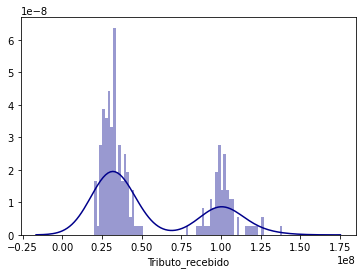

In [223]:
sns.distplot(x['Tributo_recebido'], kde=True, hist=True, bins=70, color='darkblue')

In [135]:
x['Tributo'].unique()

array(['ISS SOBRE MOVIMENTO ECONOMICO', 'ISS RETENCAO - LEI 4452',
       'ISS CONCILIA RIO - PAGTO ¿ VISTA - LEI 6156/2017',
       'ISS AUTO DE INFRACAO'], dtype=object)

In [137]:
x['NOME'].unique()

array(['botafogo', 'centro', 'barra da tijuca', 'leblon'], dtype=object)

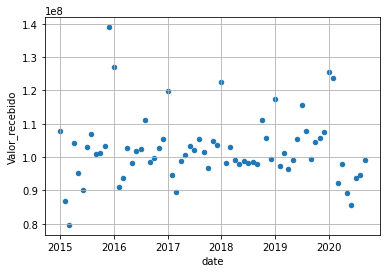

In [227]:
x.plot(y='Valor_recebido', x='date', kind='scatter')

plt.grid()

In [156]:
x.dtypes

X                   float64
Y                   float64
CB                    int64
NOME                 object
ANO_PGTO              int64
MES_PGTO              int64
CODRECEITA            int64
Tributo              object
Valor_recebido      float64
Tributo_recebido    float64
ObjectId              int64
dtype: object

In [162]:
import datetime

In [197]:
x['date'] = pd.to_datetime(x['ANO_PGTO'].astype(str)+'/'+x['MES_PGTO'].astype(str))

<ipython-input-197-ee4cb7e6dc11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['date'] = pd.to_datetime(x['ANO_PGTO'].astype(str)+'/'+x['MES_PGTO'].astype(str))


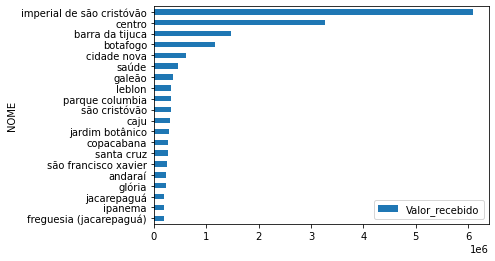

In [220]:
avg = imp_rnd.groupby(['NOME']).mean()[['Valor_recebido']].sort_values(by='Valor_recebido').tail(20)
avg[avg['Valor_recebido']>20000].plot(kind='barh')